# ***무신사 스탠다드 상의(코드001) 추천시스템***
- 2024-10-08
- 강현주

## **1. 웹 스크래핑을 통한 데이터 수집**

In [9]:
from selenium import webdriver 
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import undetected_chromedriver as uc
import requests
import time

from bs4 import BeautifulSoup
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [14]:
driver = uc.Chrome() 

In [15]:
driver.get("https://www.musinsa.com/category/001005?gf=A")

In [17]:
# https://www.musinsa.com/category/001005?gf=M      #001: 상위 카테고리 (상의, 아우터, 하의)  #005 하위 카테고리(후드티 맨투맨..) # M : 남성, F: 여성 A: ALL

In [17]:
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import time
from bs4 import BeautifulSoup
import pandas as pd

def check_and_print(value, default_message):
    if value:
        return value.text
    else:
        return default_message

# 카테고리 ID 리스트
category_ids = ["001005", "001002", "001004", "001006", "001003", "001010", "001001", "001011", "001013", "001008"]  # 맨투맨/스웨트, 셔츠/블라우스 등

# 데이터 저장을 위한 빈 리스트
data = []

# 각 카테고리별로 데이터 수집
for category_id in category_ids:
    # 카테고리 URL 설정
    url = f"https://www.musinsa.com/category/{category_id}?gf=A"
    driver.get(url)
    time.sleep(1.5)  # 페이지가 로드될 시간을 대기

    # 수집할 아이템의 목표 개수 설정
    target_item_count = 200
    item_count = 0

    # 자동 스크롤 내리면서 정보 수집
    while item_count < target_item_count:
        body = driver.find_element(By.CSS_SELECTOR, "body")
        body.send_keys(Keys.PAGE_DOWN)
        time.sleep(2)  # 스크롤이 내려가면서 페이지가 로드될 시간을 대기

        html = BeautifulSoup(driver.page_source, "html.parser")

        # 페이지 내의 아이템 정보를 찾음
        items_div = html.find("div", class_="sc-bpn0i7-1 jJArNx")
        
        if items_div:  # items_div가 None이 아닐 때만 진행
            items = items_div.find_all("div", class_="sc-fUnNpA iCowMw")
        
            # 수집한 아이템을 개수만큼 반복 처리
            for i in items:
                if item_count >= target_item_count:  # 목표 개수에 도달하면 루프 종료
                    break

                brand = check_and_print(i.find('span', class_="text-body_13px_semi sc-dcJtft sc-iGgVNO jEEFmT laXDWb font-pretendard"), "No brand text available")
                name = check_and_print(i.find('span', class_="text-body_13px_reg sc-dcJtft sc-gsFSjX jEEFmT ecuaTR font-pretendard"), "No name text available")
                price = check_and_print(i.find('span', class_="text-body_13px_semi sc-fqkwJk ioeSYE font-pretendard"), "No price text available")
                like = check_and_print(i.find('span', class_="text-etc_11px_reg text-red font-pretendard"), "No like text available")
                rating = check_and_print(i.find('span', class_="text-etc_11px_reg text-yellow font-pretendard"), "No rating text available")
                option = check_and_print(i.find('span', class_="text-etc_11px_reg absolute top-0 right-0 text-gray-500 font-pretendard"), "No option text available")
                category = check_and_print(html.find("span", class_="text-body_14px_semi text-black font-pretendard"), "No category text available")

                # 수집한 데이터 딕셔너리 생성
                item_data = {
                    "Brand": brand,
                    "Name": name,
                    "Price": price,
                    "Like": like,
                    "Rating": rating,
                    "Option": option,
                    "Category": category
                }
                
                # 데이터 리스트에 추가
                data.append(item_data)

                print("모여진 갯수 : ", item_count + 1)
                print(item_data)  # 수집한 데이터 출력

                item_count += 1  # 수집한 아이템 개수 증가
                
        else:
            print(f"No items found for category {category_id}.")
            break  # 아이템이 없으면 해당 카테고리 수집 종료

    print(f"Collected {item_count} items from category {category_id}.")

# 데이터프레임 생성
df = pd.DataFrame(data)

# # 데이터프레임을 CSV 파일로 저장 (원하는 파일 경로로 변경 가능)
# df.to_csv("musinsa_items.csv", index=False, encoding='utf-8-sig')


모여진 갯수 :  1
{'Brand': '웨스켄', 'Name': '스트라이프 인양 엠브로이드 맨투맨(브라운)', 'Price': '105,000원', 'Like': '621', 'Rating': 'No rating text available', 'Option': '남성', 'Category': '맨투맨/스웨트'}
모여진 갯수 :  2
{'Brand': '트레셔', 'Name': '크레용 매거진 로고 맨투맨 차콜 01', 'Price': '48,300원', 'Like': '549', 'Rating': '4.7', 'Option': '남성', 'Category': '맨투맨/스웨트'}
모여진 갯수 :  3
{'Brand': '로우비', 'Name': 'Dandelion flower sweat shirt _ Navy', 'Price': '45,000원', 'Like': '54', 'Rating': 'No rating text available', 'Option': '여성', 'Category': '맨투맨/스웨트'}
모여진 갯수 :  4
{'Brand': '웨스켄', 'Name': '스트라이프 인양 엠브로이드 맨투맨(브라운)', 'Price': '105,000원', 'Like': '621', 'Rating': 'No rating text available', 'Option': '남성', 'Category': '맨투맨/스웨트'}
모여진 갯수 :  5
{'Brand': '트레셔', 'Name': '크레용 매거진 로고 맨투맨 차콜 01', 'Price': '48,300원', 'Like': '549', 'Rating': '4.7', 'Option': '남성', 'Category': '맨투맨/스웨트'}
모여진 갯수 :  6
{'Brand': '로우비', 'Name': 'Dandelion flower sweat shirt _ Navy', 'Price': '45,000원', 'Like': '54', 'Rating': 'No rating text available', 'Option

In [18]:
df

,Brand,Name,Price,Like,Rating,Option,Category
0,웨스켄,스트라이프 인양 엠브로이드 맨투맨(브라운),"105,000원",621,No rating text available,남성,맨투맨/스웨트
1,트레셔,크레용 매거진 로고 맨투맨 차콜 01,"48,300원",549,4.7,남성,맨투맨/스웨트
2,로우비,Dandelion flower sweat shirt _ Navy,"45,000원",54,No rating text available,여성,맨투맨/스웨트
3,웨스켄,스트라이프 인양 엠브로이드 맨투맨(브라운),"105,000원",621,No rating text available,남성,맨투맨/스웨트
4,트레셔,크레용 매거진 로고 맨투맨 차콜 01,"48,300원",549,4.7,남성,맨투맨/스웨트
...,...,...,...,...,...,...,...
1995,유베이지,레더 블록 집업 (Cream),"109,000원",9,No rating text available,여성,기타 상의
1996,스포츠챔버,SC 오버사이즈 웜업 셔츠(라이트 그레이),"109,000원",48,No rating text available,공용,기타 상의
1997,마티올라,FLOWER LOGO HALF ZIP BLACK,"61,800원",21,No rating text available,남성,기타 상의
1998,빈폴 멘,(BC4941C214) 니트라이크 솔리드 하프집업 티셔츠 애쉬,"199,000원",No like text available,No rating text available,남성,기타 상의


In [35]:
# # 데이터프레임을 CSV 파일로 저장 (원하는 파일 경로로 변경 가능)
# df.to_csv("musinsa_items.csv", index=False, encoding='utf-8-sig')

## **2-1. 데이터 확인 및 기본적인 전처리**

In [110]:
df= pd.read_csv("musinsa_items.csv")
df

,Brand,Name,Price,Like,Rating,Option,Category
0,웨스켄,스트라이프 인양 엠브로이드 맨투맨(브라운),"105,000원",621,No rating text available,남성,맨투맨/스웨트
1,트레셔,크레용 매거진 로고 맨투맨 차콜 01,"48,300원",549,4.7,남성,맨투맨/스웨트
2,로우비,Dandelion flower sweat shirt _ Navy,"45,000원",54,No rating text available,여성,맨투맨/스웨트
3,웨스켄,스트라이프 인양 엠브로이드 맨투맨(브라운),"105,000원",621,No rating text available,남성,맨투맨/스웨트
4,트레셔,크레용 매거진 로고 맨투맨 차콜 01,"48,300원",549,4.7,남성,맨투맨/스웨트
...,...,...,...,...,...,...,...
1995,유베이지,레더 블록 집업 (Cream),"109,000원",9,No rating text available,여성,기타 상의
1996,스포츠챔버,SC 오버사이즈 웜업 셔츠(라이트 그레이),"109,000원",48,No rating text available,공용,기타 상의
1997,마티올라,FLOWER LOGO HALF ZIP BLACK,"61,800원",21,No rating text available,남성,기타 상의
1998,빈폴 멘,(BC4941C214) 니트라이크 솔리드 하프집업 티셔츠 애쉬,"199,000원",No like text available,No rating text available,남성,기타 상의


### 결측치 확인 및 대치
- Like, Rating, Option : 결측치 존재

In [111]:
print('Rating 결측치 수 : ',(df['Rating']=='No rating text available').sum())

Rating 결측치 수 :  447


In [112]:
print('결측치 대치 전, Like 결측치 수 :', (df['Like']=='No like text available').sum())
df.loc[df['Like'] == 'No like text available', 'Like'] = 0
print('결측치 대치 후, Like 결측치 수 :', (df['Like']=='No like text available').sum())

결측치 대치 전, Like 결측치 수 : 21
결측치 대치 후, Like 결측치 수 : 0


In [113]:
print('결측치 대치 전, Option 결측치 수 :', (df['Option']=='No option text available').sum())
df.loc[df['Option'] == 'No option text available', 'Option'] = 0
print('결측치 대치 후, Option 결측치 수 :', (df['Option']=='No option text available').sum())

결측치 대치 전, Option 결측치 수 : 8
결측치 대치 후, Option 결측치 수 : 0


### Like 데이터 확인하니, 값이 1.2천, 526 이런 식으로 단위가 맞지 않았다.

In [114]:
#Like 값이 0.0천 인 데이터 수 
(df['Like'].str[-1] == '천').sum()

530

In [115]:
(df['Like'].str[-1] == '만').sum()

64

In [116]:
# '천'과 '만' 단위를 포함한 값을 숫자로 변환
def convert_like(value):
    # 값이 문자열인지 확인
    if isinstance(value, str):
        if '천' in value:
            return float(value.replace('천', '')) * 1000
        elif '만' in value:
            return float(value.replace('만', '')) * 10000
        else:
            return float(value)
    # 값이 이미 숫자형일 경우 그대로 반환
    else:
        return value

# Like 컬럼의 값을 변환
df['Like'] = df['Like'].apply(convert_like)

df['Like']


0       621.0
1       549.0
2        54.0
3       621.0
4       549.0
        ...  
1995      9.0
1996     48.0
1997     21.0
1998      0.0
1999      8.0
Name: Like, Length: 2000, dtype: float64

### Price 데이터 확인하니, 값이 120,000원 이런 형태로 저장되어있었다. 
- ',' 제거
- '원' 제거

In [117]:
# Price 컬럼에서 '원'을 제거하고 ','를 지우기
df['Price'] = df['Price'].str.replace('원', '').str.replace(',', '')
# 숫자로 변환
df['Price'] = df['Price'].astype(int)

In [118]:
df

,Brand,Name,Price,Like,Rating,Option,Category
0,웨스켄,스트라이프 인양 엠브로이드 맨투맨(브라운),105000,621.0,No rating text available,남성,맨투맨/스웨트
1,트레셔,크레용 매거진 로고 맨투맨 차콜 01,48300,549.0,4.7,남성,맨투맨/스웨트
2,로우비,Dandelion flower sweat shirt _ Navy,45000,54.0,No rating text available,여성,맨투맨/스웨트
3,웨스켄,스트라이프 인양 엠브로이드 맨투맨(브라운),105000,621.0,No rating text available,남성,맨투맨/스웨트
4,트레셔,크레용 매거진 로고 맨투맨 차콜 01,48300,549.0,4.7,남성,맨투맨/스웨트
...,...,...,...,...,...,...,...
1995,유베이지,레더 블록 집업 (Cream),109000,9.0,No rating text available,여성,기타 상의
1996,스포츠챔버,SC 오버사이즈 웜업 셔츠(라이트 그레이),109000,48.0,No rating text available,공용,기타 상의
1997,마티올라,FLOWER LOGO HALF ZIP BLACK,61800,21.0,No rating text available,남성,기타 상의
1998,빈폴 멘,(BC4941C214) 니트라이크 솔리드 하프집업 티셔츠 애쉬,199000,0.0,No rating text available,남성,기타 상의


In [119]:
# 혹시 모르니 복사본 저장해놓기
df_copy = df
df_copy

,Brand,Name,Price,Like,Rating,Option,Category
0,웨스켄,스트라이프 인양 엠브로이드 맨투맨(브라운),105000,621.0,No rating text available,남성,맨투맨/스웨트
1,트레셔,크레용 매거진 로고 맨투맨 차콜 01,48300,549.0,4.7,남성,맨투맨/스웨트
2,로우비,Dandelion flower sweat shirt _ Navy,45000,54.0,No rating text available,여성,맨투맨/스웨트
3,웨스켄,스트라이프 인양 엠브로이드 맨투맨(브라운),105000,621.0,No rating text available,남성,맨투맨/스웨트
4,트레셔,크레용 매거진 로고 맨투맨 차콜 01,48300,549.0,4.7,남성,맨투맨/스웨트
...,...,...,...,...,...,...,...
1995,유베이지,레더 블록 집업 (Cream),109000,9.0,No rating text available,여성,기타 상의
1996,스포츠챔버,SC 오버사이즈 웜업 셔츠(라이트 그레이),109000,48.0,No rating text available,공용,기타 상의
1997,마티올라,FLOWER LOGO HALF ZIP BLACK,61800,21.0,No rating text available,남성,기타 상의
1998,빈폴 멘,(BC4941C214) 니트라이크 솔리드 하프집업 티셔츠 애쉬,199000,0.0,No rating text available,남성,기타 상의


## **2-2. 추천시스템을 위한 데이터 전처리(데이터 인코딩))**

In [120]:
import pandas as pd
import numpy as np

# 1. 범주형 데이터 변환 (라벨 인코딩)
df['Category'] = df['Category'].astype('category').cat.codes
df['Option'] = df['Option'].astype('category').cat.codes

# 2. 결측치 처리
# 'No rating text available' 값을 NaN으로 변환
df['Rating'] = df['Rating'].replace('No rating text available', np.nan)

# 나머지 숫자 값들은 부동 소수점(float) 형식으로 변환
df['Rating'] = df['Rating'].astype(float)

df.head()

,Brand,Name,Price,Like,Rating,Option,Category
0,웨스켄,스트라이프 인양 엠브로이드 맨투맨(브라운),105000,621.0,NaN,2,3
1,트레셔,크레용 매거진 로고 맨투맨 차콜 01,48300,549.0,4.7,2,3
2,로우비,Dandelion flower sweat shirt _ Navy,45000,54.0,NaN,3,3
3,웨스켄,스트라이프 인양 엠브로이드 맨투맨(브라운),105000,621.0,NaN,2,3
4,트레셔,크레용 매거진 로고 맨투맨 차콜 01,48300,549.0,4.7,2,3


### 연속형 데이터 범주화를 하기 위해 데이터 분포를 확인해보자.

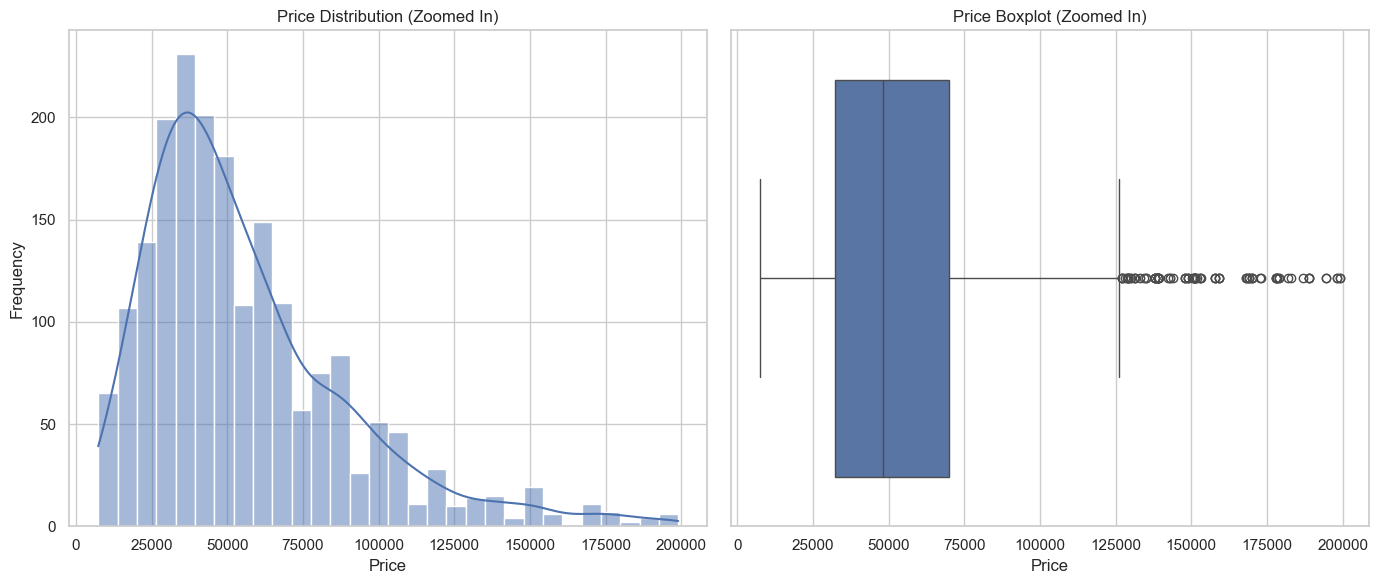

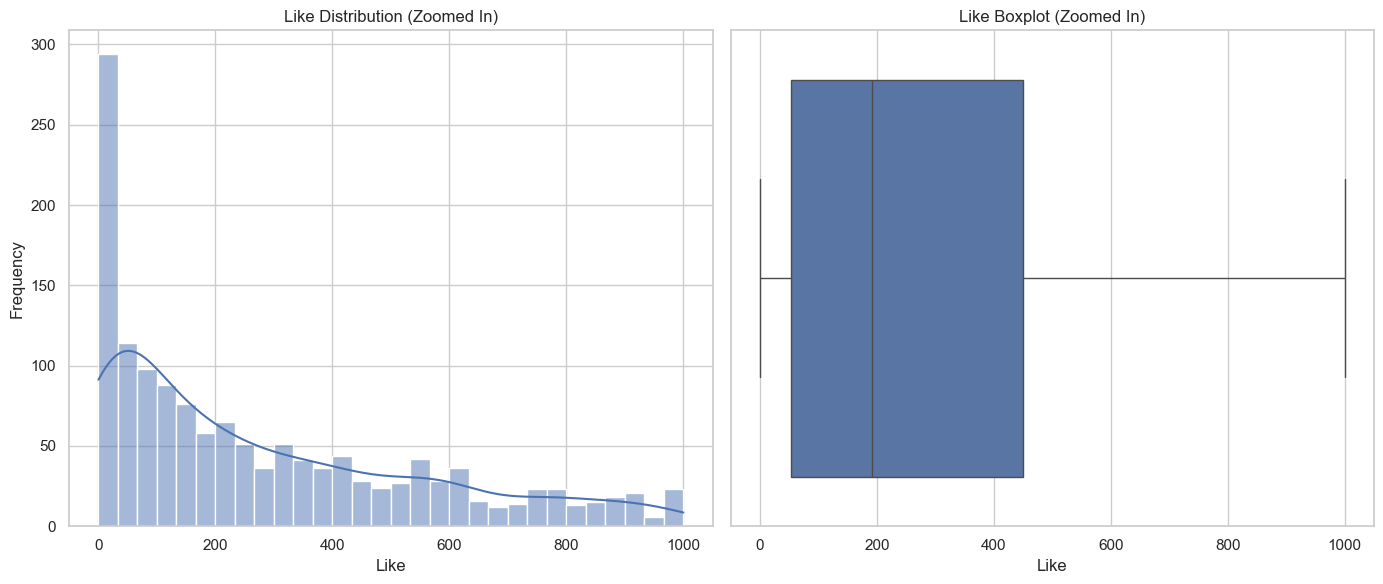

In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 그래프 스타일 설정
sns.set(style="whitegrid")

# Price 집중 분포 구간 시각화 (예: 0에서 200000 사이)
price_min, price_max = 0, 200000

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)  # 1행 2열의 첫 번째 그래프
sns.histplot(df[(df['Price'] >= price_min) & (df['Price'] <= price_max)]['Price'], bins=30, kde=True)
plt.title('Price Distribution (Zoomed In)')
plt.xlabel('Price')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)  # 1행 2열의 두 번째 그래프
sns.boxplot(x=df[(df['Price'] >= price_min) & (df['Price'] <= price_max)]['Price'])
plt.title('Price Boxplot (Zoomed In)')
plt.xlabel('Price')

plt.tight_layout()
plt.show()

# Like 집중 분포 구간 시각화 (예: 0에서 1000 사이)
like_min, like_max = 0, 1000

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)  # 1행 2열의 첫 번째 그래프
sns.histplot(df[(df['Like'] >= like_min) & (df['Like'] <= like_max)]['Like'], bins=30, kde=True)
plt.title('Like Distribution (Zoomed In)')
plt.xlabel('Like')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)  # 1행 2열의 두 번째 그래프
sns.boxplot(x=df[(df['Like'] >= like_min) & (df['Like'] <= like_max)]['Like'])
plt.title('Like Boxplot (Zoomed In)')
plt.xlabel('Like')

plt.tight_layout()
plt.show()


In [122]:
df['Price'].max()

1425000

In [123]:
# 가격 범주화
price_bins = [0, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000, 150000, 200000, 1500000]
price_labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12] #11: 15만원~20만원 #12: 20만원 이상을 표현하고자함

df['Price_Category'] = pd.cut(df['Price'], bins=price_bins, labels=price_labels, right=False)

# 결과 확인
df[['Price', 'Price_Category']].head()

,Price,Price_Category
0,105000,10
1,48300,4
2,45000,4
3,105000,10
4,48300,4


In [124]:
df['Like'].max()

110000.0

In [125]:
# 가격 범주화
like_bins = [0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 150000]
like_labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10] #10 : 좋아요 1000개 이상

df['Like_Category'] = pd.cut(df['Like'], bins=like_bins, labels=like_labels, right=False)

# 결과 확인
df[['Like', 'Like_Category']].head()

,Like,Like_Category
0,621.0,6
1,549.0,5
2,54.0,0
3,621.0,6
4,549.0,5


In [126]:
del df['Price']
del df['Like']

In [127]:
df

,Brand,Name,Rating,Option,Category,Price_Category,Like_Category
0,웨스켄,스트라이프 인양 엠브로이드 맨투맨(브라운),NaN,2,3,10,6
1,트레셔,크레용 매거진 로고 맨투맨 차콜 01,4.7,2,3,4,5
2,로우비,Dandelion flower sweat shirt _ Navy,NaN,3,3,4,0
3,웨스켄,스트라이프 인양 엠브로이드 맨투맨(브라운),NaN,2,3,10,6
4,트레셔,크레용 매거진 로고 맨투맨 차콜 01,4.7,2,3,4,5
...,...,...,...,...,...,...,...
1995,유베이지,레더 블록 집업 (Cream),NaN,3,0,10,0
1996,스포츠챔버,SC 오버사이즈 웜업 셔츠(라이트 그레이),NaN,1,0,10,0
1997,마티올라,FLOWER LOGO HALF ZIP BLACK,NaN,2,0,6,0
1998,빈폴 멘,(BC4941C214) 니트라이크 솔리드 하프집업 티셔츠 애쉬,NaN,2,0,11,0


## **3. 추천 시스템 : 행렬 인수분해**

In [181]:
df_selected = df[['Rating', 'Option', 'Category', 'Price_Category', 'Like_Category']]
rating_matrix = df_selected.to_numpy()
rating_matrix 

array([[ nan,  2. ,  3. , 10. ,  6. ],
       [ 4.7,  2. ,  3. ,  4. ,  5. ],
       [ nan,  3. ,  3. ,  4. ,  0. ],
       ...,
       [ nan,  2. ,  0. ,  6. ,  0. ],
       [ nan,  2. ,  0. , 11. ,  0. ],
       [ nan,  3. ,  0. ,  3. ,  0. ]])

In [182]:
mask = ~np.isnan(rating_matrix)
mask

array([[False,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True],
       ...,
       [False,  True,  True,  True,  True],
       [False,  True,  True,  True,  True],
       [False,  True,  True,  True,  True]])

In [183]:
import numpy as np

# 예시 설정
# m: 사용자 수, n: 아이템 수
m, n = rating_matrix.shape

# 가중치 행렬 초기화 (U와 V)
np.random.seed(42)  # 재현성을 위해 시드 설정
k = 5 
U = np.random.rand(m, k)
V = np.random.rand(n, k)

# 학습률 설정
lr = 0.001
losses = []

for i in range(5000):
    # 예측 행렬 계산
    rating_matrix_pred = U @ V.T

    # 오류 행렬 계산 (mask를 사용해 NaN이 아닌 값만 포함)
    E = np.zeros((m, n))
    E[mask] = rating_matrix_pred[mask] - rating_matrix[mask]  # NaN이 아닌 값에 대한 오차

    # U와 V의 그래디언트 계산
    U_grad = E @ V  # U에 대한 미분
    V_grad = E.T @ U  # V에 대한 미분

    # 가중치 업데이트
    U[mask] = U[mask] - U_grad[mask] * lr  # NaN이 아닌 U만 업데이트
    V = V - V_grad * lr  # V는 모든 값 업데이트

    # 손실 계산
    loss = np.sum(E[mask] ** 2)
    losses.append(loss)
    
    # 손실 출력 (주기적으로 출력)
    if i % 500 == 0:
        print(f'Iteration {i}, Loss: {loss}')

# 결과 확인
print("Final Loss:", loss)


Iteration 0, Loss: 177680.15511336178
Iteration 500, Loss: 591.3578905579045
Iteration 1000, Loss: 22.10016061706402
Iteration 1500, Loss: 0.16917861295737907
Iteration 2000, Loss: 0.0012829439091106864
Iteration 2500, Loss: 9.732204068663358e-06
Iteration 3000, Loss: 7.382731574762423e-08
Iteration 3500, Loss: 5.600450655013268e-10
Iteration 4000, Loss: 4.248433961739412e-12
Iteration 4500, Loss: 3.22281050478445e-14
Final Loss: 2.468769916392879e-16


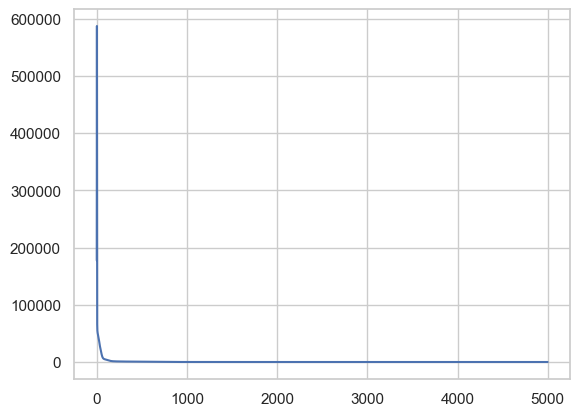

In [184]:
import matplotlib.pyplot as plt

plt.plot(losses)
plt.show()

In [185]:
rating_matrix_pred

array([[ 5.53622885e+00,  2.00000000e+00,  3.00000000e+00,
         1.00000000e+01,  6.00000000e+00],
       [ 4.70000000e+00,  2.00000000e+00,  3.00000000e+00,
         4.00000000e+00,  5.00000000e+00],
       [ 2.22935241e+00,  3.00000000e+00,  3.00000000e+00,
         4.00000000e+00, -1.16033554e-15],
       ...,
       [ 4.64828343e+00,  2.00000000e+00, -7.57488918e-16,
         6.00000000e+00,  8.76426749e-16],
       [ 3.92656367e+00,  2.00000000e+00, -2.40641266e-15,
         1.10000000e+01,  2.30113379e-16],
       [ 7.24365667e+00,  3.00000000e+00,  1.56289605e-15,
         3.00000000e+00, -1.76691780e-15]])

In [188]:
# 1열에서 4.5 이상인 인덱스 찾기
indices = np.where(rating_matrix_pred[:, 0] >= 4.5)[0]

# 4.5 이상인 값과 인덱스 출력
values_above_4 = rating_matrix_pred[indices, :]
print("Indices of rows where the first column is >= 4.5:", indices)
print("Values where the first column is >= 4.5:\n", values_above_4)


Indices of rows where the first column is >= 4.5: [   0    1    4 ... 1993 1997 1999]
Values where the first column is >= 4.5:
 [[ 5.53622885e+00  2.00000000e+00  3.00000000e+00  1.00000000e+01
   6.00000000e+00]
 [ 4.70000000e+00  2.00000000e+00  3.00000000e+00  4.00000000e+00
   5.00000000e+00]
 [ 4.70000000e+00  2.00000000e+00  3.00000000e+00  4.00000000e+00
   5.00000000e+00]
 ...
 [ 4.55390571e+00  2.00000000e+00  5.28094151e-16  1.10000000e+01
   6.90673437e-16]
 [ 4.64828343e+00  2.00000000e+00 -7.57488918e-16  6.00000000e+00
   8.76426749e-16]
 [ 7.24365667e+00  3.00000000e+00  1.56289605e-15  3.00000000e+00
  -1.76691780e-15]]


In [206]:
df = df.drop_duplicates()
df

,Brand,Name,Rating,Option,Category,Price_Category,Like_Category
0,웨스켄,스트라이프 인양 엠브로이드 맨투맨(브라운),NaN,2,3,10,6
1,트레셔,크레용 매거진 로고 맨투맨 차콜 01,4.7,2,3,4,5
2,로우비,Dandelion flower sweat shirt _ Navy,NaN,3,3,4,0
6,노스페이스,NM5MQ03A 남성 마운틴 피크 스웻셔츠,4.4,2,3,5,10
7,펜듈럼,아치 로고 맨투맨 BLACK (LN6TU153-076),5.0,2,3,1,0
...,...,...,...,...,...,...,...
1995,유베이지,레더 블록 집업 (Cream),NaN,3,0,10,0
1996,스포츠챔버,SC 오버사이즈 웜업 셔츠(라이트 그레이),NaN,1,0,10,0
1997,마티올라,FLOWER LOGO HALF ZIP BLACK,NaN,2,0,6,0
1998,빈폴 멘,(BC4941C214) 니트라이크 솔리드 하프집업 티셔츠 애쉬,NaN,2,0,11,0


In [212]:
a = pd.DataFrame(rating_matrix_pred, columns = df.iloc[:, 2:].columns)
b = pd.concat([df, a], axis = 1)
b = b.dropna(subset=['Name'])

# 조건에 맞는 데이터를 저장할 빈 리스트
results = []

# 기존 반복문에서 조건을 만족하는 행을 리스트에 추가
for i in range(len(b)):
    data = b.iloc[i]
    if (data['Rating'][1] > 4) and pd.isnull(data['Rating'][0]):
        results.append(data['Name'])

# 결과를 DataFrame으로 변환
results_df = pd.DataFrame(results, columns=['Name'])

# 결과 출력
results_df


,Name
0,스트라이프 인양 엠브로이드 맨투맨(브라운)
1,SET 남성 쭈리 트레이닝셋업
2,[44-120] 비베이슈즈 라인 하프집업 스웻셔츠 차콜
3,여성 피케조직 스웨트 셔츠 레드 (BJ3841A136)
4,[기모]EV 만달라 스컬 오버핏 맨투맨
...,...
231,(UNISEX) WINDBREAKER TOP NAVY_M_UDJU4B121N2
232,하프 집업 스웨트 셔츠 (블랙)
233,꽃 지고 열매 맺고 바람 막이 - 다크 그레이
234,FLOWER LOGO HALF ZIP BLACK


### 성별에 맞는 추천 시스템을 구현하고 싶어서 option 적용

In [215]:
#option : 공용 = 1, 남성=2, 여성=3

In [234]:
a = pd.DataFrame(rating_matrix_pred, columns=df.iloc[:, 2:].columns)
b = pd.concat([df, a], axis=1)
b = b.dropna(subset=['Name'])

# 조건에 맞는 데이터를 저장할 빈 리스트
results = []

user_option = int(input("옵션을 입력하세요(공용=1, 남성=2, 여성=3) :"))

# 기존 반복문에서 조건을 만족하는 행을 리스트에 추가
for i in range(len(b)):
    data = b.iloc[i]
    if (data['Option'][0] == user_option) and (data['Rating'][1] > 4) and pd.isnull(data['Rating'][0]):
        results.append(data['Name'])

# 결과를 DataFrame으로 변환
results_df = pd.DataFrame(results, columns=['Name'])

# 결과 출력
results_df


옵션을 입력하세요(공용=1, 남성=2, 여성=3) : 3


,Name
0,[44-120] 비베이슈즈 라인 하프집업 스웻셔츠 차콜
1,여성 피케조직 스웨트 셔츠 레드 (BJ3841A136)
2,Boucle Logo Sweatshirt (Lavender)
3,투 라인 로고 레글런 스웻 셔츠_아이보리
4,화이트라벨 코튼블랜드 맨투맨_D/NAVY
...,...
121,BIKE MESH JACKET WHITE
122,레이어드 브라 탑 (블랙)
123,써클 볼레로 크롭 스웨트셔츠(블랙)
124,하프 집업 스웨트 셔츠 (블랙)
